##### Summary

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
#importing datasets
df=pd.read_csv("Telecom churn.csv")
pd.set_option("display.max_columns",None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
#checking the shape
df.shape

(7043, 21)

In [53]:
#check the object type
df.dtypes

#tenure, senior citizen and monthly charges are in numerical datatype

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

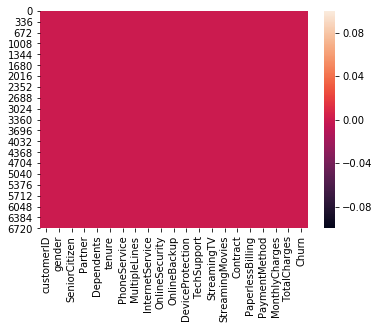

In [54]:
#checking if there are any missing data
sns.heatmap(df.isnull())

In [55]:
df.isnull().sum()
#There are no missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [56]:
#However, if we observe there are empty cells in Total charges which are not represented by NaN, such cells are as shown below
df.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [57]:
#converting the total charges column datatype from object to integer
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce') #errors='coerce'. This will convert the blank spaces to NaN
df['TotalCharges']

#Invalid parsing has been set as NaN

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [58]:
df['TotalCharges'].isnull().sum() #NaN values are being converted

11

In [59]:
nullcharges=df[df.isnull().any(axis=1)]
nullcharges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Observations
1. Since there is no information on the Total charges, the NaN values can be filled by using monthly charges. We can keep it equal to monlthly charges as we have no other information.

In [60]:
#Filling the missing values in Total Charges
#df.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],:]
df.iloc[488,19]=52.55
df.iloc[753,19]=20.25
df.iloc[936,19]=80.85
df.iloc[1082,19]=25.75
df.iloc[1340,19]=56.05
df.iloc[3331,19]=19.85
df.iloc[3826,19]=25.35
df.iloc[4380,19]=20.00
df.iloc[5218,19]=19.70
df.iloc[6670,19]=73.35
df.iloc[6754,19]=61.90

In [61]:
df['TotalCharges'].isnull().sum()

0

#### Univariate Analysis

In [62]:
#checking the no. of unique values

#training dataset

col_name=[]
unique_value=[]

for i in df.columns:
    col_name.append(str(i))
    unique_value.append(df[i].nunique())

table=pd.DataFrame()
table['column_name']=col_name
table['Value']=unique_value

table=table.sort_values('Value', ascending=False)
table

,column_name,Value
0,customerID,7043
19,TotalCharges,6534
18,MonthlyCharges,1585
5,tenure,73
17,PaymentMethod,4
11,DeviceProtection,3
15,Contract,3
14,StreamingMovies,3
13,StreamingTV,3
12,TechSupport,3


Observations
1. customerID is unique ID given to each customer
2. Total charges has 6531 unique values. It is the total bill for the customer. 
3. Monthly charges has 1585 unique values.

In [63]:
#Value counts of columns in the dataset
columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for i in columns:
    print(df[i].value_counts())
    print("")

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No 

Attribute wise analysis
1. There are 3555 male and 3488 female customers.
2. There are 1142 senior citizens and 5901 who are not senior citizens.
3. 3641 have no partners. 3402 have partners.
4. 4933 have no dependents and 2110 have dependents.
5. Tenure is the no. of months and there are 73 unique values.
6. 6361 have phone service and 682 have no phone service.
7. 2971 have multiplelines, 3390 have no multiple lines and 682 have no phone service.
8. 1526 have no internet service, 3096 have fibre optic service and 2421 have DSL service.
9. 3875 have month to month contract, 1695 have two year contract and 1473 have one year contract.
10. 4171 have paperlessbilling and 2872 have paper bill sent to them.
11. Payment method
    2365 send through electronic cheques, 1612 mail the cheques, 1544 send bank transfers and 1522 pay through credit cards.
12. 5174 have not churned and 1869 have churned.

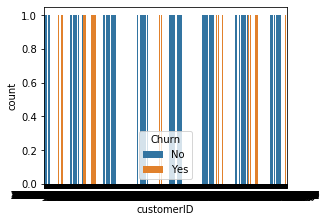

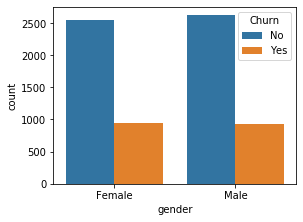

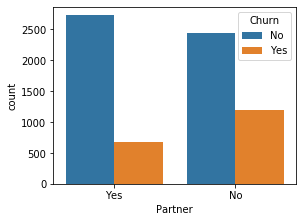

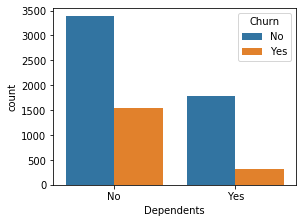

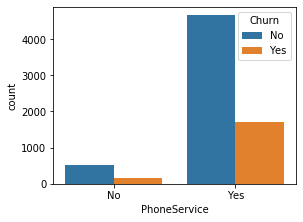

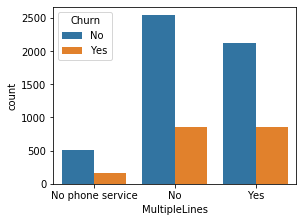

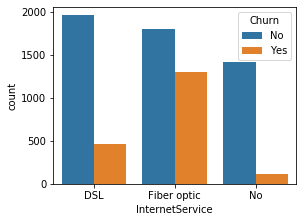

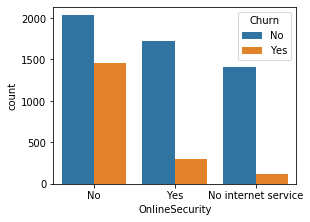

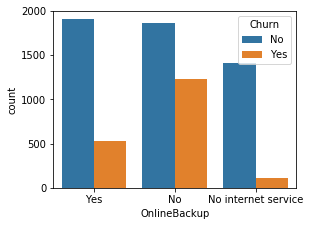

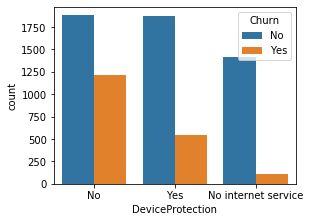

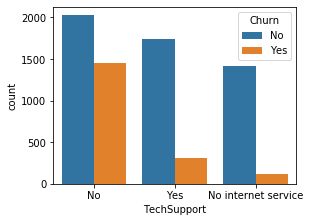

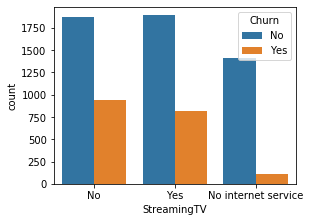

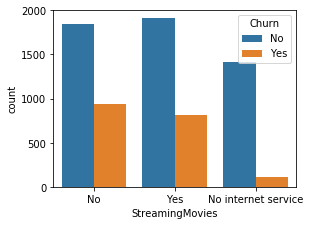

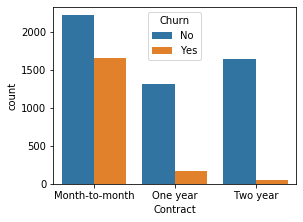

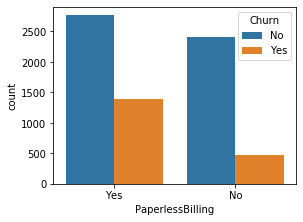

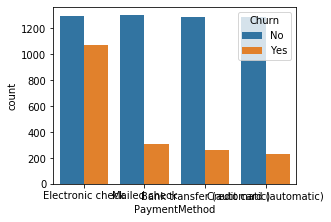

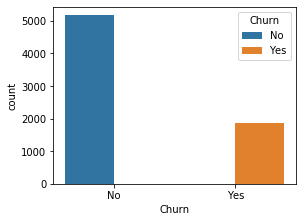

In [64]:
#checking the count plot of categorical variables along with camparison to Churn
for i in df.columns:
    if df[i].dtype=='O':
        plt.figure(figsize=(20,15))
        plt.subplot(4,4,2)
        sns.countplot(df[i], hue=df['Churn'])
        plt.show()

Observation
1. Female and Male are similar with respect to churn. The ratios are same.
2. People with partner are little more than people without partners. However people with partner are most likely not to churn.
3. Customers with dependents are less likely to churn.
4. The ratio of customers with multiple lines churning is more when compared to people without multiple lines. However, the no. of churns seems almost equal.
5. Customers who have fiber optic internet service are more likely to churn than people having DSL. People without internet is less likely to churn. However, fiber optic is the future of internet.
6. Customers who have opted for online security, Device Protection, Tech support and online backup are less likely to churn than who have not opted. Customers with no internet service are even less likely to churn.
7. Streaming TV and Streaming movies have no much impact on the churn. Customers who have opted them are little less likely to churn and the difference is not high.
8. Customers who have opted for month to month are highly likely to churn and one year and two year contract customers are not likely to churn.
9. Customers who have opted for paperless billing are likely to churn and those have not opted for it. However, this cannot be a major criterion for deciding the customers who churn.
10. Customers who make electronic cheque payment are more likely to churn than other payment modes.

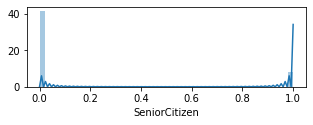

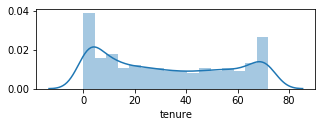

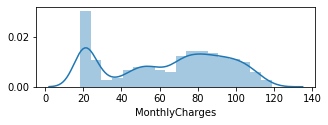

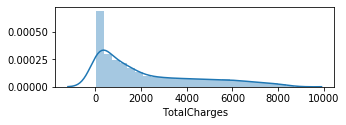

In [65]:
# checking the histogram 
for i in df.columns:
    if df[i].dtypes!='O':
        plt.figure(figsize=(5,5))
        plt.subplot(3,1,3)
        sns.distplot(df[i])

Observations
1. Tenure is widely distributed from one month to more than 70 months (over 5.5 years)
2. Monthly charges is mostly around 20-30 and around 80-110.
3. Total charges is mostly within 2000 and is right skewed.

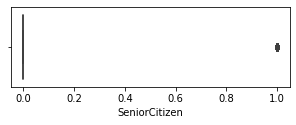

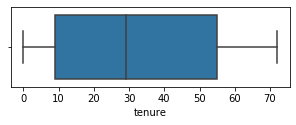

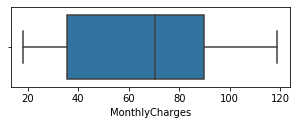

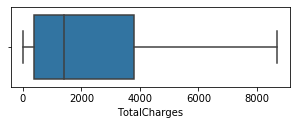

In [66]:
# checking the outliers using boxplot
for i in df.columns:
    if df[i].dtypes!='O':
        plt.figure(figsize=(5,5))
        plt.subplot(3,1,3)
        sns.boxplot(df[i])

Observations
1. There are no outliers in the data
2. The median tenure is around 30 months.
3. The median monthly charges is around 70. 
4. The median total charges is around 1600-1700.

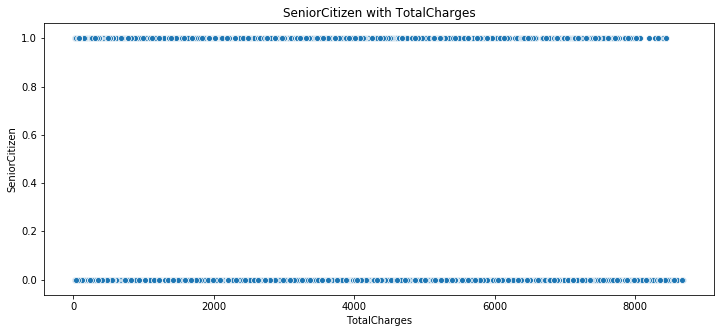

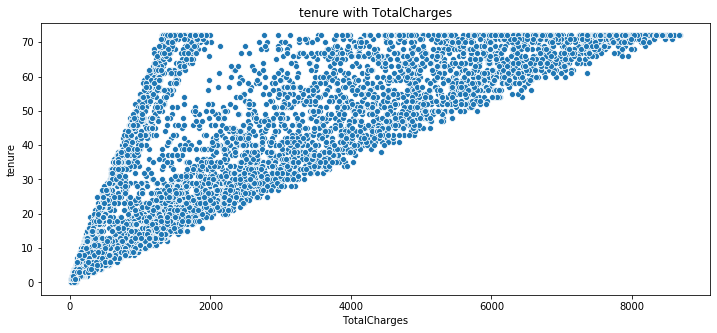

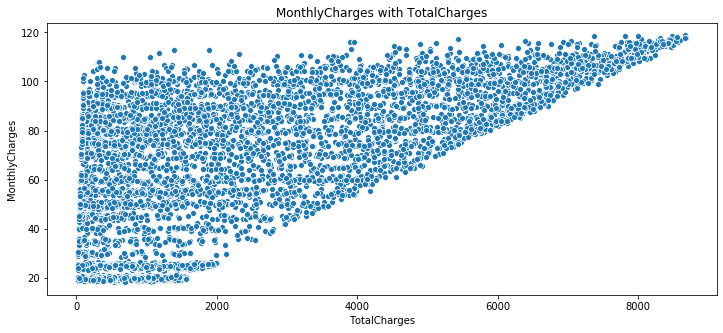

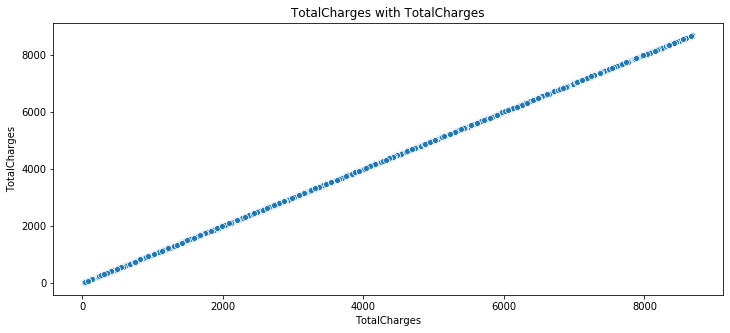

In [85]:
#checking relationship using scatterplots
for i in df.columns:
    if df[i].dtypes!='O':
        plt.figure(figsize=(12,5))
        plt.title(str(i)+' with '+'TotalCharges')
        sns.scatterplot(x=df['TotalCharges'], y=df[i], data=df)
        plt.show()

Observations
1. Montlycharges and tenure have positive correlation with the total charges.

In [67]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2549.999497
Yes,0.254682,17.979133,74.441332,1531.796094


Observations
1. The customers who have churned are relatively stayed for less tenure average being 18 when compared to customers who have not churned at 37.5.
2. The monthly charges of customers who have churned is higher than those who have not churned.
3. The total charges of customers who have churned is lesser than those who have not churned.

#### Statistical Analysis

In [78]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Observations
1. The average tenure is 32 months and maximum is 72.
2. Monthly charges average is 64 and maximum is 118.
3. Average total charges is 2279 and maximum is 8684.


#### checking correlation

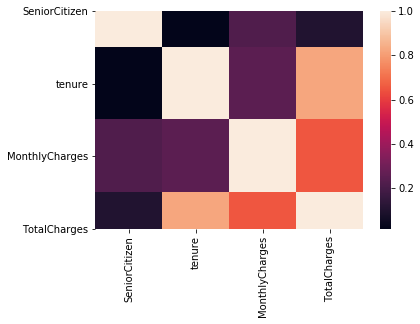

In [79]:
sns.heatmap(df.corr())

In [80]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102997
tenure,0.016567,1.000000,0.247900,0.826164
MonthlyCharges,0.220173,0.247900,1.000000,0.651182
TotalCharges,0.102997,0.826164,0.651182,1.000000


Observations
1. Total charges, monthly charges and tenure are positively correlated to each other.

In [81]:
# drop the customer ID since it is unique value for all rows
df1=df.drop('customerID', axis=1)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
#### encoding the data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for i in df1.columns:
    if df1.columns.dtype=='O':
        df1[i]=lb.fit_transform(df1[i].astype(str))

In [87]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,971,1674,0
1,1,0,0,0,21,1,0,0,2,0,2,0,0,0,1,0,3,1367,519,0
2,1,0,0,0,4,1,0,0,2,2,0,0,0,0,0,1,3,1298,624,1
3,1,0,0,0,35,0,1,0,2,0,2,2,0,0,1,0,0,1109,445,0
4,0,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,40,6451,1


#### removing outliers


In [88]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
print("The datashape before removing outliers is ", df1.shape)
df2=df1[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", df2.shape)

The datashape before removing outliers is  (7043, 20)
The datashape after removing outliers is  (6361, 20)


#### splitting the data into input and output variables

In [93]:
x=df2.iloc[:,0:-1]
y=pd.DataFrame(df2.iloc[:,-1])
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,1,0,0,0,21,1,0,0,2,0,2,0,0,0,1,0,3,1367,519
2,1,0,0,0,4,1,0,0,2,2,0,0,0,0,0,1,3,1298,624
4,0,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,40,6451
5,0,0,0,0,69,1,2,1,0,0,2,0,2,2,0,1,2,644,5677
6,1,0,0,1,7,1,2,1,0,2,0,0,2,0,0,1,1,423,612


In [94]:
y.head()

,Churn
1,0
2,1
4,1
5,1
6,0


#### checking skewness

In [95]:
df2.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure             -0.010961
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges      0.265446
TotalCharges       -0.050802
Churn               1.053055
dtype: float64

In [96]:
#Using sqrt function to remove the skewness
for i in df2.columns:
    if df2.skew()[i]>0.55:
        df2[i]=np.sqrt(df2[i])

### Classification Model Development

Since we need to predict categorical data, let us build classification model.

##### Using Standardscaler 

In [99]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.992638,-0.441591,-0.972245,-0.653600,-0.612055,0.0,-0.936163,-1.350531,1.436848,-1.052857,1.262811,-0.935165,-1.148627,-1.152974,0.370335,-1.211765,1.335443,1.563622,-1.464777
1,0.992638,-0.441591,-0.972245,-0.653600,-1.328492,0.0,-0.936163,-1.350531,1.436848,1.252556,-1.044785,-0.935165,-1.148627,-1.152974,-0.828495,0.825243,1.335443,1.404837,-1.409273
2,-1.007416,-0.441591,-0.972245,-0.653600,-1.328492,0.0,-0.936163,0.046790,-0.929747,-1.052857,-1.044785,-0.935165,-1.148627,-1.152974,-0.828495,0.825243,0.399691,-1.490118,1.670942
3,-1.007416,-0.441591,-0.972245,-0.653600,1.410824,0.0,1.068190,0.046790,-0.929747,-1.052857,1.262811,-0.935165,1.145381,1.141072,-0.828495,0.825243,0.399691,-0.100172,1.261797
4,0.992638,-0.441591,-0.972245,1.529987,-1.202062,0.0,1.068190,0.046790,-0.929747,1.252556,-1.044785,-0.935165,1.145381,-1.152974,-0.828495,0.825243,-0.536060,-0.608745,-1.415616


#### deriving the best random_state for splitting the data into train and test

In [101]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def max_acc_score(reg,x1,y1):
    max_acc_score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The max accuracy score ", max_acc_score, "is achieved at", final_r_state)
    return final_r_state

In [102]:
#Checking the Logistic Regression for the above
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

max_acc_score(lg,x,y)

The max accuracy score  0.8036135113904164 is achieved at 42


42

In [104]:
#We need to finalise the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.20)

We need to check the performance of other modules and their scores. For the same we need to use GridSearchCV to select best parameters for the models

### GridSearchCV for selecting best parameters

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_


{'algorithm': 'ball_tree', 'n_neighbors': 15, 'weights': 'uniform'}

In [107]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [109]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
#After obtaining best parameters, we should now check the models

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy score is  0.8036135113904164

The cross val score is 0.7868293332271681

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       933
           1       0.67      0.52      0.59       340

    accuracy                           0.80      1273
   macro avg       0.75      0.71      0.73      1273
weighted avg       0.79      0.80      0.80      1273


[[845  88]
 [162 178]]

roc_auc_score 0.714605005989534


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
  

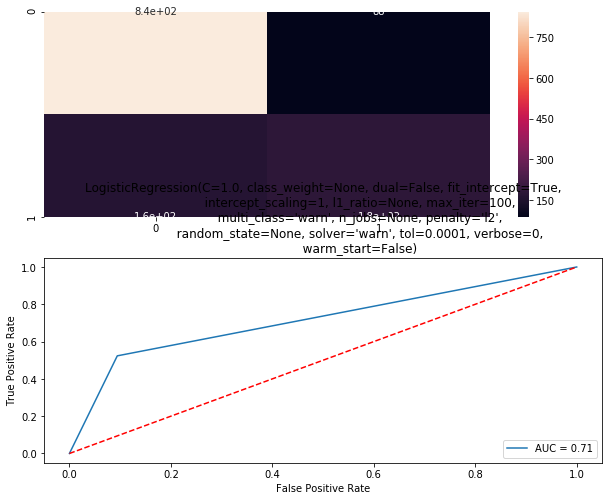

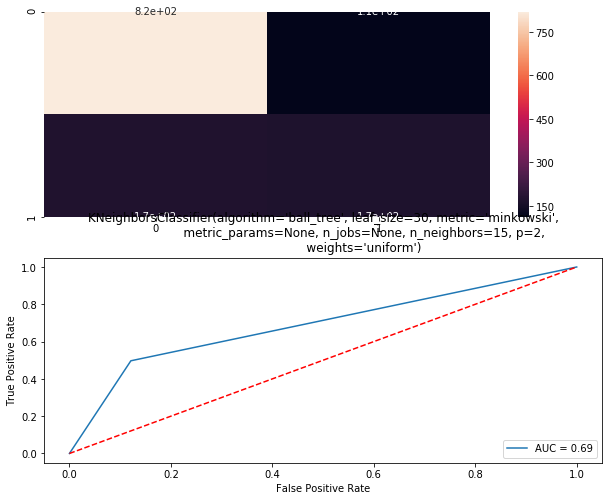

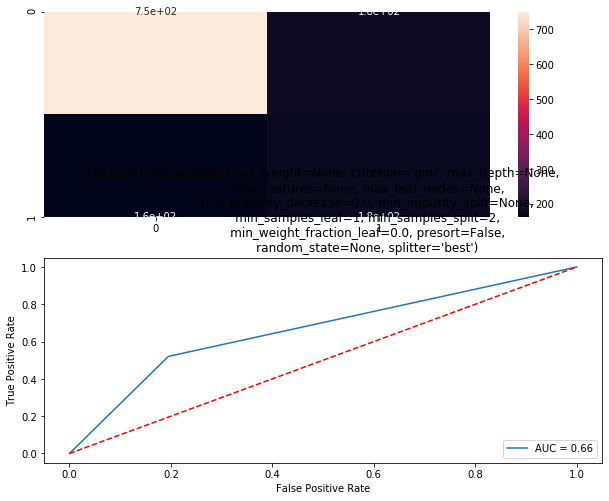

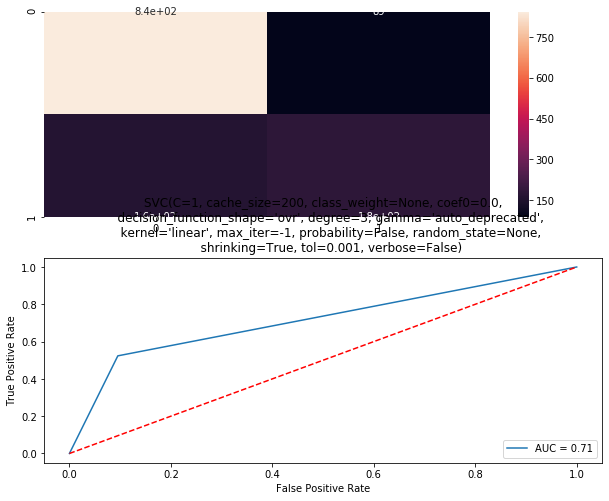

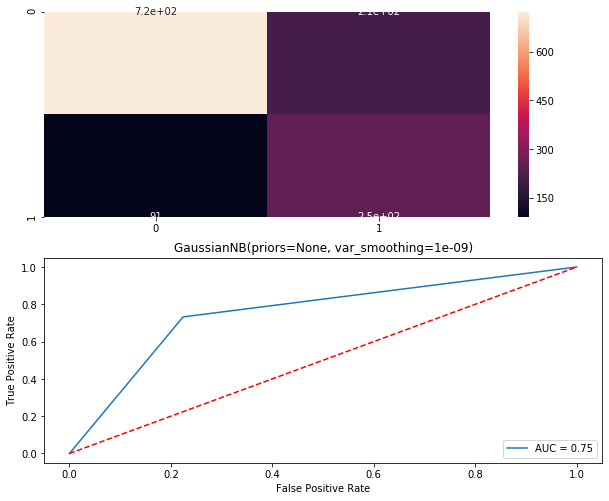

In [115]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='ball_tree', n_neighbors= 15, weights='uniform'), DecisionTreeClassifier(criterion= 'gini', splitter= 'best'), SVC(C=1, kernel='linear'), GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [116]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model.logistic.Logistic...,0.803614,0.786829,0.714605
1,<class 'sklearn.neighbors.classification.KNeig...,0.776905,0.766861,0.687972
2,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.728987,0.724889,0.662759
3,<class 'sklearn.svm.classes.SVC'>,0.802828,0.782425,0.714069
4,<class 'sklearn.naive_bayes.GaussianNB'>,0.764336,0.755069,0.754172


In [117]:
#Let us try ensemble Boosters to achieve more accuracy

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':(10,50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 200}

In [119]:
#checking the best accuracy score and random state for RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)
max_acc_score(rf,x,y)

The max accuracy score  0.8012568735271013 is achieved at 65


65

In [120]:
#checking the cross val score
cs=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of Random forest classifier is", cs)

The cross val score of Random forest classifier is 0.7808527591327439


In [122]:
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500)}
gd=GridSearchCV(gc,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [123]:
#checking the best accuracy score and random state for GradientBoostingClassifier
gc=GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 50)
max_acc_score(gc,x,y)

The max accuracy score  0.7549096622152396 is achieved at 92


92

In [124]:
#checking the cross val score
cs=cross_val_score(gc,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of GradientBoosting classifier is", cs)

The cross val score of GradientBoosting classifier is 0.7329036874418575


In [125]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500)}
gd=GridSearchCV(ad,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [126]:
#checking the best accuracy score and random state for AdaBoostClassifier
ada=AdaBoostClassifier(learning_rate= 0.1, n_estimators= 500)
max_acc_score(ada,x,y)

The max accuracy score  0.809897879025923 is achieved at 63


63

In [127]:
#checking the cross val score
cs=cross_val_score(ada,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of AdaBoost classifier is", cs)

The cross val score of AdaBoost classifier is 0.790125165913829


In [128]:
result2=pd.DataFrame({'Boosters':['RandomForestClassifier','GradientBoostClassifier','AdaBoostRegressor'],'Accuracy Score':[0.801,0.755,0.810],'Cross_val_score':[0.781,0.732,0.790]})
result2

,Boosters,Accuracy Score,Cross_val_score
0,RandomForestClassifier,0.801,0.781
1,GradientBoostClassifier,0.755,0.732
2,AdaBoostRegressor,0.810,0.790


In [129]:
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model.logistic.Logistic...,0.803614,0.786829,0.714605
1,<class 'sklearn.neighbors.classification.KNeig...,0.776905,0.766861,0.687972
2,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.728987,0.724889,0.662759
3,<class 'sklearn.svm.classes.SVC'>,0.802828,0.782425,0.714069
4,<class 'sklearn.naive_bayes.GaussianNB'>,0.764336,0.755069,0.754172


When we compare the results, we can conclude that Logistic Regression is giving better results. So we can finalise the same

In [130]:
lg=LogisticRegression()
lg.fit(train_x,train_y)
pred=lg.predict(test_x)
score=accuracy_score(test_y,pred)
cvs=cross_val_score(lg,x,y,cv=5).mean()
print("The accuracy score is ", score)
print("The cross validation score is", cvs)

The accuracy score is  0.8036135113904164
The cross validation score is 0.7868293332271681


In [131]:
#now we can save the model
from sklearn.externals import joblib
joblib.dump(lg,"Project15_customer_churn.pkl")

['Project15_customer_churn.pkl']